In [49]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [50]:
import itertools
import os


import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.12.0
Hub version: 0.14.0
GPU is available


In [51]:
# importing necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model,layers
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import os
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications import VGG16
from keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, BatchNormalization, Activation, Dropout, Flatten, Conv2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import ResNet50
from keras.applications.resnet import preprocess_input
from keras.models import Sequential
from keras.layers import Dense


In [52]:
# data loading and pre-processing
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
        if len(images)>3:
            break
    fig=plt.figure(figsize=(10,12))
    xrange=range(1,3)

    for img,x in zip(images,xrange):
        ax=fig.add_subplot(2,2,x)
        ax.imshow(img)
        ax.set_title(img.shape)

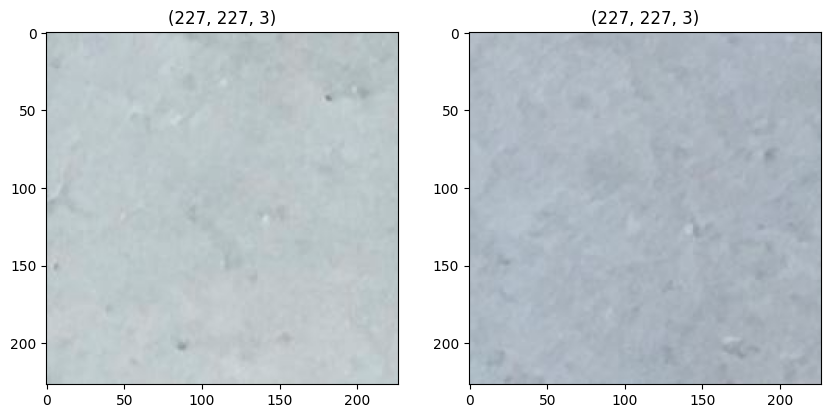

In [53]:
load_images('/content/gdrive/MyDrive/Cracks/Negative')

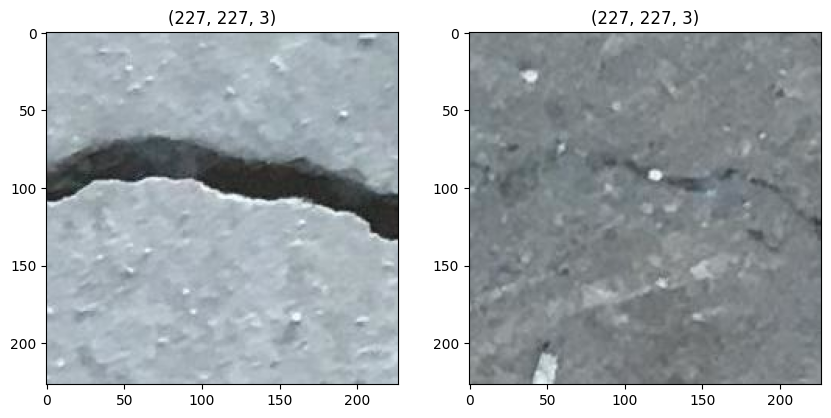

In [54]:
load_images('/content/gdrive/MyDrive/Cracks/Positive')

In [30]:
def preprocess_images(folder):
  images_rgb = cv2.imread(folder,cv2.COLOR_BGR2RGB)

In [55]:
preprocess_images('/content/gdrive/MyDrive/Cracks/Negative')

In [57]:
preprocess_images('/content/gdrive/MyDrive/Cracks/Positive')

In [58]:
import cv2
import os

def enhance_and_convert(input_directory, output_directory):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for filename in os.listdir(input_directory):
        if filename.endswith(".jpg") or filename.endswith(".jpeg"):
            img_path = os.path.join(input_directory, filename)
            img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) for image enhancement
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            img_enhanced = clahe.apply(img_gray)

            # Convert grayscale image to RGB format
            img_rgb = cv2.cvtColor(img_enhanced, cv2.COLOR_GRAY2RGB)

            output_path = os.path.join(output_directory, filename)
            cv2.imwrite(output_path, img_rgb)



In [ ]:
enhance_and_convert('/content/gdrive/MyDrive/Cracks/Positive','/content/gdrive/MyDrive/Crack_identification_data/ENHANCEDCRACKEDIMAGES')

In [ ]:
enhance_and_convert('/content/gdrive/MyDrive/Cracks/Negative', '/content/gdrive/MyDrive/Crack_identification_data/ENHANCEDUNCRACKEDIMAGES')

In [59]:
# Load and display the enhanced and converted images after application of CLAHE framework
def load_RGBimages(folder):
    images_RGB = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images_RGB.append(img)
        if len(images_RGB)>3:
            break
    fig=plt.figure(figsize=(10,12))
    xrange=range(1,3)

    for img,x in zip(images_RGB,xrange):
        ax=fig.add_subplot(2,2,x)
        ax.imshow(img)
        ax.set_title(img.shape)

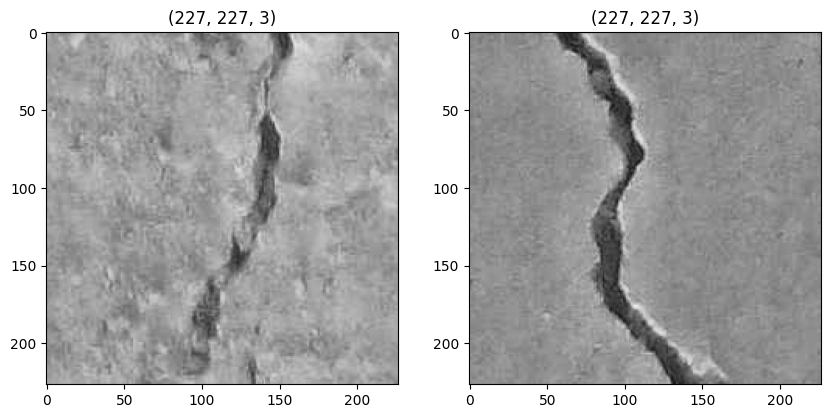

In [36]:
load_RGBimages('/content/gdrive/MyDrive/Crack_identification_data/ENHANCEDCRACKEDIMAGES')

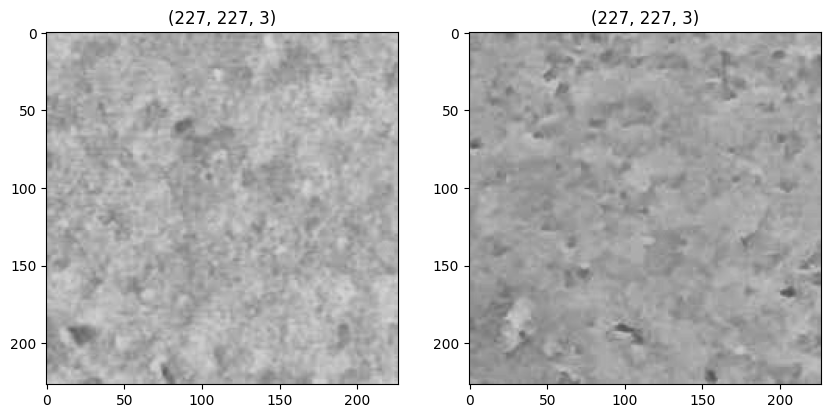

In [37]:
load_RGBimages('/content/gdrive/MyDrive/Crack_identification_data/ENHANCEDUNCRACKEDIMAGES')

In [38]:
# Function for image augmentation
def augment_images(input_directory, output_directory, num_augmented_images=5):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    for filename in os.listdir(input_directory):
        if filename.endswith(".jpg") or filename.endswith(".jpeg"):
            img_path = os.path.join(input_directory, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            img = img.reshape((1,) + img.shape)  # Reshape to (1, height, width, channels)

            # Generate augmented images and save them
            i = 0
            for batch in datagen.flow(img, batch_size=1, save_to_dir=output_directory, save_prefix='aug_', save_format='jpeg'):
                i += 1
                if i >= num_augmented_images:
                    break

In [ ]:
augment_images('/content/drive/MyDrive/Crack_identification_data/train/ConvertedRGBimagesforUncracked', '/content/drive/MyDrive/Crack_identification_data/train/AugmentedImagesUncracked', num_augmented_images=5)

In [ ]:
augment_images('/content/drive/MyDrive/Crack_identification_data/train/convertedRGBimages4Cracked', '/content/drive/MyDrive/Crack_identification_data/train/AugmentedImagesCracked', num_augmented_images=5)

In [12]:
 rmdir/'content/gdrive/MyDrive/Crack_identification_data/ .ipynb_checkpoints'

rmdir: failed to remove '/content/gdrive/MyDrive/Crack_identification_data/ .ipynb_checkpoints': No such file or directory


In [60]:
# Image generators

train_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.3)

train_generator = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Cracks',
                                                     target_size=(150,150),
                                                     batch_size=64,
                                                     shuffle=True,
                                                     class_mode='binary',
                                                     subset='training')

validation_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.3)

validation_generator =  validation_datagen.flow_from_directory('/content/gdrive/MyDrive/Cracks',
                                                                target_size=(150,150),
                                                                batch_size=64,
                                                                class_mode='binary',
                                                                subset='validation')

Found 28000 images belonging to 2 classes.
Found 12000 images belonging to 2 classes.


MODEL TRAINING VIA TRANSFER LEARNING: VGG16


In [61]:
# The first CNN Algorithm: VGG16
def build_transfer_model(base_model, num_classes):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model


In [62]:
# function to plot training history
def plot_history(history):
    # store results
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # plot results
    # accuracy
    plt.figure(figsize=(5, 8))
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.grid'] = True
    plt.rcParams['figure.facecolor'] = 'white'
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy: {str(round(acc[-1],3))}\nValidation Accuracy: {str(round(val_acc[-1],3))}')

    # loss
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.title(f'Training and Validation Loss. \nTrain Loss: {str(round(loss[-1],3))}\nValidation Loss: {str(round(val_loss[-1],3))}')
    plt.xlabel('epoch')
    plt.tight_layout(pad=3.0)
    plt.show()

In [43]:
pretrained_model=VGG16(input_shape = (150, 150, 3),
                        include_top = False,
                        weights ='imagenet')


for layer in pretrained_model.layers:
     layer.trainable = False

In [63]:
last_layer = pretrained_model.get_layer('block5_pool')
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model_vgg = Model(pretrained_model.input, x)


model_vgg.compile(optimizer = RMSprop(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [64]:
# To get the summary of the model and output shape
model_vgg.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [65]:
# defining a callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.999):
            print("\nEnough accuracy!")
            self.model.stop_training = True

In [66]:
# Assigning callbacks into a tuple
callbacks = myCallback()

In [67]:
history = model_vgg.fit(train_generator,
                                  validation_data = validation_generator,
                                  epochs = 15,
                                  verbose = 1,
                                   callbacks=[callbacks])

Epoch 1/15
438/438 [==============================] - 9741s 22s/step - loss: 0.0357 - accuracy: 0.9884 - val_loss: 0.0166 - val_accuracy: 0.9948
Epoch 2/15
438/438 [==============================] - 79s 181ms/step - loss: 0.0146 - accuracy: 0.9956 - val_loss: 0.0141 - val_accuracy: 0.9956
Epoch 3/15
438/438 [==============================] - 82s 186ms/step - loss: 0.0119 - accuracy: 0.9963 - val_loss: 0.0150 - val_accuracy: 0.9959
Epoch 4/15
438/438 [==============================] - 83s 188ms/step - loss: 0.0101 - accuracy: 0.9967 - val_loss: 0.0130 - val_accuracy: 0.9959
Epoch 5/15
438/438 [==============================] - 83s 189ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.0115 - val_accuracy: 0.9962
Epoch 6/15
438/438 [==============================] - 83s 189ms/step - loss: 0.0084 - accuracy: 0.9973 - val_loss: 0.0122 - val_accuracy: 0.9961
Epoch 7/15
438/438 [==============================] - 83s 190ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0109 - val_ac

In [68]:
# Save the model
tf.keras.models.save_model(model_vgg,'my_model1.hdf5')

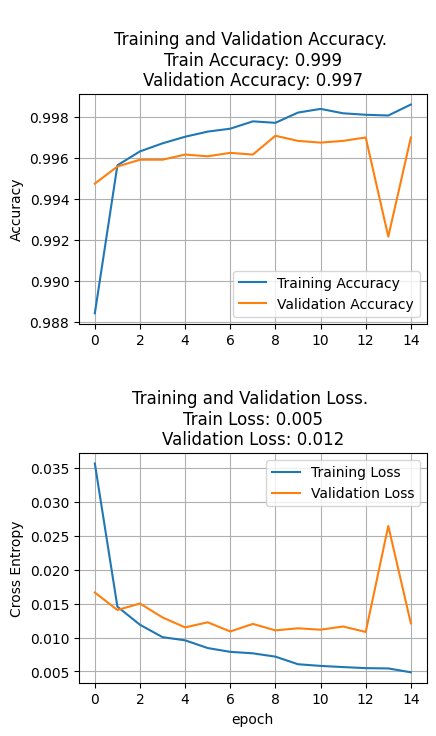

In [69]:
# Visualization of model performance
plot_history(history)

MODEL TRAINING: VGG19 MODEL


In [70]:
# function to plot training history
def plot_history(history):
    # store results
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # plot results
    # accuracy
    plt.figure(figsize=(5, 8))
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.grid'] = True
    plt.rcParams['figure.facecolor'] = 'white'
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy: {str(round(acc[-1],3))}\nValidation Accuracy: {str(round(val_acc[-1],3))}')

    # loss
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.title(f'Training and Validation Loss. \nTrain Loss: {str(round(loss[-1],3))}\nValidation Loss: {str(round(val_loss[-1],3))}')
    plt.xlabel('epoch')
    plt.tight_layout(pad=3.0)
    plt.show()

In [71]:
pretrained_model=VGG19(input_shape = (150, 150, 3),
                        include_top = False,
                        weights ='imagenet')


for layer in pretrained_model.layers:
     layer.trainable = False

80134624/80134624 [==============================] - 3s 0us/step


In [72]:
last_layer = pretrained_model.get_layer('block5_pool')
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model_vgg19 = Model(pretrained_model.input, x)


model_vgg19.compile(optimizer = RMSprop(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [73]:
model_vgg19.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [74]:
# defining a callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.999):
            print("\nEnough accuracy!")
            self.model.stop_training = True

In [75]:
callbacks = myCallback()

In [76]:
history = model_vgg19.fit(train_generator,
                                  validation_data = validation_generator,
                                  epochs = 15,
                                  verbose = 1,
                                   callbacks=[callbacks])

Epoch 1/15
438/438 [==============================] - 95s 214ms/step - loss: 0.0339 - accuracy: 0.9889 - val_loss: 0.0193 - val_accuracy: 0.9940
Epoch 2/15
438/438 [==============================] - 96s 220ms/step - loss: 0.0148 - accuracy: 0.9955 - val_loss: 0.0169 - val_accuracy: 0.9950
Epoch 3/15
438/438 [==============================] - 99s 226ms/step - loss: 0.0126 - accuracy: 0.9960 - val_loss: 0.0239 - val_accuracy: 0.9933
Epoch 4/15
438/438 [==============================] - 99s 226ms/step - loss: 0.0111 - accuracy: 0.9970 - val_loss: 0.0162 - val_accuracy: 0.9952
Epoch 5/15
438/438 [==============================] - 99s 225ms/step - loss: 0.0108 - accuracy: 0.9968 - val_loss: 0.0177 - val_accuracy: 0.9953
Epoch 6/15
438/438 [==============================] - 99s 225ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.0152 - val_accuracy: 0.9954
Epoch 7/15
438/438 [==============================] - 99s 226ms/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.0214 - val_ac

In [77]:
# Save the model
tf.keras.models.save_model(model_vgg19,'my_model2.hdf5')

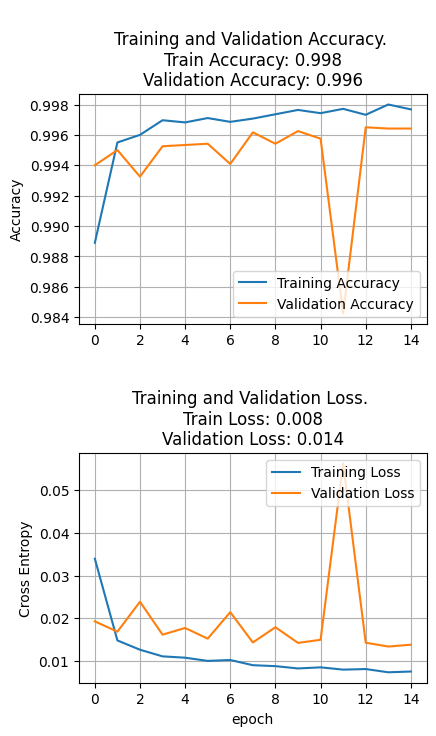

In [78]:
plot_history(history)

MODEL TRAINING: THIRD APPROACH (RESNET50)


In [79]:
# Image generators for ResNet50

train_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.3)

train_generator = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Cracks',
                                                     target_size=(224,224),
                                                     batch_size=64,
                                                     shuffle=True,
                                                     class_mode='binary',
                                                     subset='training')

validation_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.3)

validation_generator =  validation_datagen.flow_from_directory('/content/gdrive/MyDrive/Cracks',
                                                                target_size=(224,224),
                                                                batch_size=64,
                                                                class_mode='binary',
                                                                subset='validation')

Found 28000 images belonging to 2 classes.
Found 12000 images belonging to 2 classes.


In [ ]:
model_resnet50 = Sequential()

model_resnet50.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet'
    ))

model_resnet50.add(Dense(1, activation='sigmoid'))

model_resnet50.layers[0].trainable = False

model_resnet50.summary()

steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)

In [82]:
callbacks = myCallback()

model_resnet50.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model_resnet50.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[callbacks]
)

Epoch 1/15
438/438 [==============================] - 128s 285ms/step - loss: 0.1424 - accuracy: 0.9556 - val_loss: 0.1850 - val_accuracy: 0.9328
Epoch 2/15
438/438 [==============================] - 124s 283ms/step - loss: 0.1372 - accuracy: 0.9568 - val_loss: 0.1856 - val_accuracy: 0.9284
Epoch 3/15
438/438 [==============================] - 124s 283ms/step - loss: 0.1330 - accuracy: 0.9577 - val_loss: 0.1779 - val_accuracy: 0.9333
Epoch 4/15
438/438 [==============================] - 124s 283ms/step - loss: 0.1297 - accuracy: 0.9579 - val_loss: 0.1726 - val_accuracy: 0.9377
Epoch 5/15
438/438 [==============================] - 124s 284ms/step - loss: 0.1266 - accuracy: 0.9592 - val_loss: 0.1704 - val_accuracy: 0.9369
Epoch 6/15
438/438 [==============================] - 124s 283ms/step - loss: 0.1240 - accuracy: 0.9598 - val_loss: 0.1718 - val_accuracy: 0.9340
Epoch 7/15
438/438 [==============================] - 124s 283ms/step - loss: 0.1217 - accuracy: 0.9607 - val_loss: 0.1661 -

In [83]:
# Save the model
tf.keras.models.save_model(model_resnet50,'my_model3.hdf5')

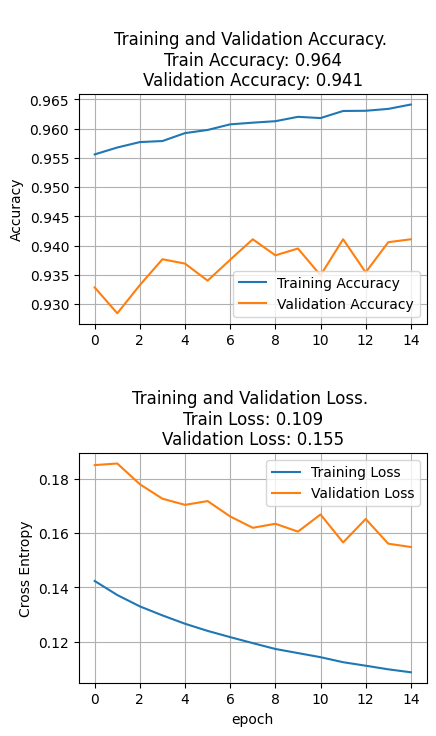

In [85]:
plot_history(history)

In [86]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 33.3 MB/s eta 0:00:00
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzlocal-5.0.1:
      Successfully uninstalled tzlocal-5.0.1


In [87]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st

Writing app.py


In [90]:
!pip install opencv-python-headless  # For image processing

In [91]:
import numpy as np
import cv2  # For image processing
from PIL import Image

In [92]:
def load_crack_detection_model(model_path):
    model = tf.keras.models.load_model(model_path)  # Load your crack detection model here
    return model

In [96]:
def perform_crack_detection(model, image):
    image = np.array(image)
    result = model.predict(image)
    return result

In [95]:
def perform_deflection_detection(model, image):
    image = np.array(image)
    result = model.predict(image)
    return result

In [97]:

def main():
    st.title("Crack and Deflection Detection")

    uploaded_file = st.file_uploader("Upload an image", type=["jpg", "png", "jpeg"])

    if uploaded_file is not None:
        crack_model = load_crack_detection_model("path_to_crack_model")  # Replace with actual paths
        deflection_model = load_deflection_detection_model("path_to_deflection_model")

        image = Image.open(uploaded_file)

        st.image(image, caption="Uploaded Image", use_column_width=True)
        st.write("")

        crack_result = perform_crack_detection(crack_model, image)
        deflection_result = perform_deflection_detection(deflection_model, image)

        st.subheader("Crack Detection")
        st.write(crack_result)  # Display crack detection result

        st.subheader("Deflection Detection")
        st.write(deflection_result)  # Display deflection detection result

if __name__ == "__main__":
    main()